In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyqg_subgrid_experiments as pse

In [2]:
param = pse.ZB2020Parameterization()

dataset = pse.Dataset('../pyqg_subgrid_experiments/tests/fixtures/train.nc')

In [3]:
preds, sims, distances = param.test_on(dataset, n_simulations=1)

INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 6.18e-07, CFL: 0.006
INFO: Step: 2000, Time: 7.20e+06, KE: 4.19e-07, CFL: 0.006
INFO: Step: 3000, Time: 1.08e+07, KE: 5.63e-07, CFL: 0.006
INFO: Step: 4000, Time: 1.44e+07, KE: 8.07e-07, CFL: 0.006
INFO: Step: 5000, Time: 1.80e+07, KE: 1.19e-06, CFL: 0.006
INFO: Step: 6000, Time: 2.16e+07, KE: 1.79e-06, CFL: 0.006
INFO: Step: 7000, Time: 2.52e+07, KE: 2.75e-06, CFL: 0.006
INFO: Step: 8000, Time: 2.88e+07, KE: 4.28e-06, CFL: 0.006
INFO: Step: 9000, Time: 3.24e+07, KE: 6.73e-06, CFL: 0.006
INFO: Step: 10000, Time: 3.60e+07, KE: 1.07e-05, CFL: 0.006
INFO: Step: 11000, Time: 3.96e+07, KE: 1.71e-05, CFL: 0.007
INFO: Step: 12000, Time: 4.32e+07, KE: 2.75e-05, CFL: 0.009
INFO: Step: 13000, Time: 4.68e+07, KE: 4.44e-05, CFL: 0.012
INFO: Step: 14000, Time: 5.04e+07, KE: 7.19e-05, CFL: 0.015
INFO: Step: 15000, Time: 5.40e+07, KE: 1.17e-04, CFL: 0.019
INFO: Step: 16000, Time: 5.76e+07, KE: 1.87e-04, CFL: 0.024
INFO: Step: 17000, Time

In [4]:
preds

<xarray.Dataset>
Dimensions:                                   (run: 1, time: 9, lev: 2, y: 64, x: 64)
Coordinates:
  * x                                         (x) float32 7.812e+03 ... 9.922...
  * y                                         (y) float32 7.812e+03 ... 9.922...
  * time                                      (time) timedelta64[ns] 0 days 0...
  * lev                                       (lev) int32 1 2
Dimensions without coordinates: run
Data variables: (12/25)
    u_forcing_advection                       (run, time, lev, y, x) float32 dask.array<chunksize=(1, 9, 2, 64, 64), meta=np.ndarray>
    v_forcing_advection                       (run, time, lev, y, x) float32 dask.array<chunksize=(1, 9, 2, 64, 64), meta=np.ndarray>
    u_forcing_advection_predictions           (run, time, lev, y, x) float64 dask.array<chunksize=(1, 9, 2, 64, 64), meta=np.ndarray>
    u_forcing_advection_spatial_mse           (lev, y, x) float64 dask.array<chunksize=(2, 64, 64), meta=np.ndarray>
    u_forcing_advection_temporal_mse          (time, lev) float64 dask.array<chunksize=(9, 2), meta=np.ndarray>
    u_forcing_advection_mse                   (lev) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    ...                                        ...
    v_forcing_advection_spatial_correlation   (lev, y, x) float64 dask.array<chunksize=(2, 64, 64), meta=np.ndarray>
    v_forcing_advection_temporal_correlation  (time, lev) float64 dask.array<chunksize=(9, 2), meta=np.ndarray>
    v_forcing_advection_correlation           (lev) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    correlation                               (lev) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mse                                       (lev) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    skill                                     (lev) float64 dask.array<chunksize=(2,), meta=np.ndarray>
Attributes: (12/26)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         3600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    hires:           256
    lores:           64
    pyqg_params:     {"nx": 64, "dt": 3600.0, "tmax": 311040000.0, "tavestart...

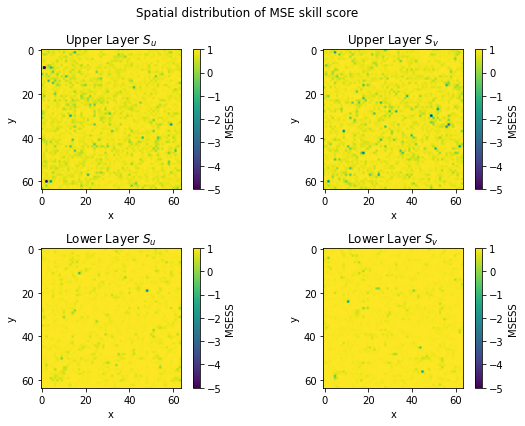

In [19]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Spatial distribution of MSE skill score")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_spatial_skill"].isel(lev=z).data
            plt.imshow(arr, vmax=1, vmin=-5)
            plt.colorbar(label='MSESS')
            plt.xlabel("x")
            plt.ylabel("y")

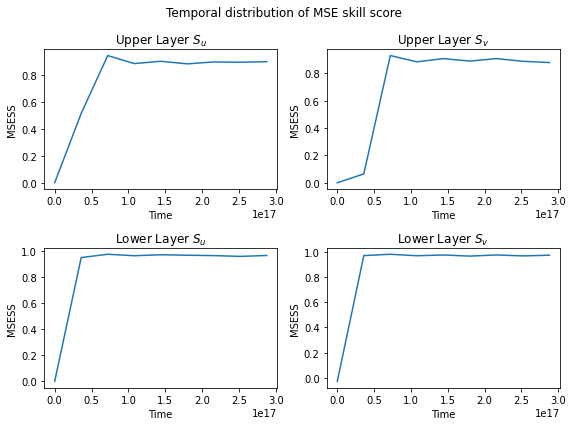

In [20]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Temporal distribution of MSE skill score")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_temporal_skill"].isel(lev=z).data
            plt.plot(preds.time, arr)
            plt.xlabel("Time")
            plt.ylabel("MSESS")

In [21]:
distances

defaultdict(dict,
            {'q1_wasserstein_distance': 2.8947262632506325e-07,
             'u1_wasserstein_distance': 0.0015983092757011486,
             'v1_wasserstein_distance': 0.0016677533706359604,
             'ke1_wasserstein_distance': 0.00013698539515077414,
             'enstrophy1_wasserstein_distance': 9.47379680569297e-13,
             'vorticity1_wasserstein_distance': 1.280991771036381e-07,
             'q2_wasserstein_distance': 7.771886328271889e-08,
             'u2_wasserstein_distance': 0.0004567933060735663,
             'v2_wasserstein_distance': 0.0002980140378773255,
             'ke2_wasserstein_distance': 2.794435134201214e-06,
             'enstrophy2_wasserstein_distance': 1.870971233701254e-14,
             'vorticity2_wasserstein_distance': 1.582632573637218e-08,
             'paramspec_mean_difference': 1.1643420950148846e-20,
             'entspec_mean_difference': 4.583293008194798e-25,
             'entspec_loglog_slope_difference': -0.77890638881

In [80]:
import importlib
importlib.reload(pse)
importlib.reload(pse.plot_helpers)

<module 'pyqg_subgrid_experiments.plot_helpers' from '/Users/andrewross/code/pyqg_experiments/pyqg_subgrid_experiments/plot_helpers.py'>

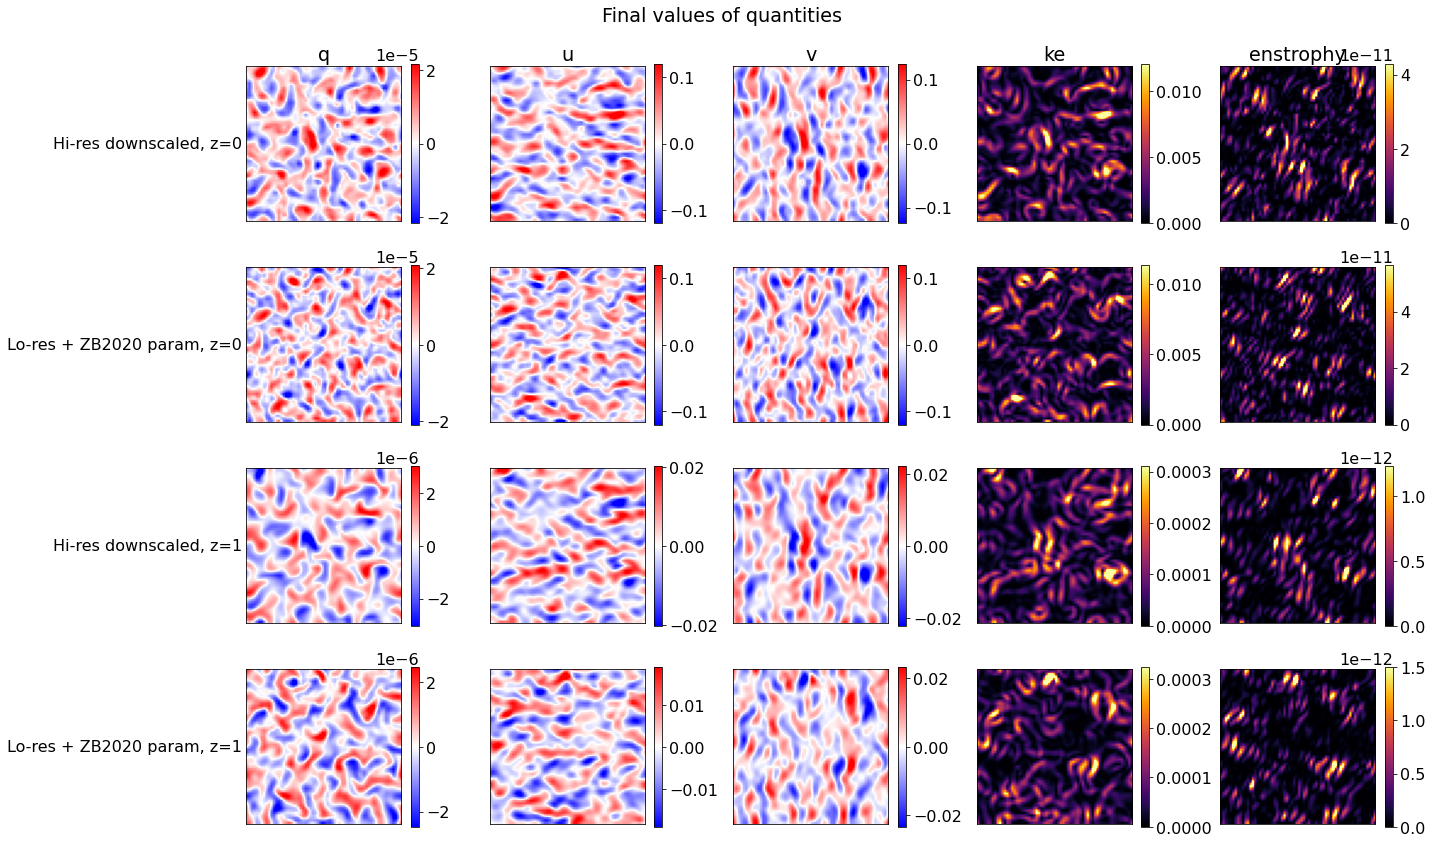

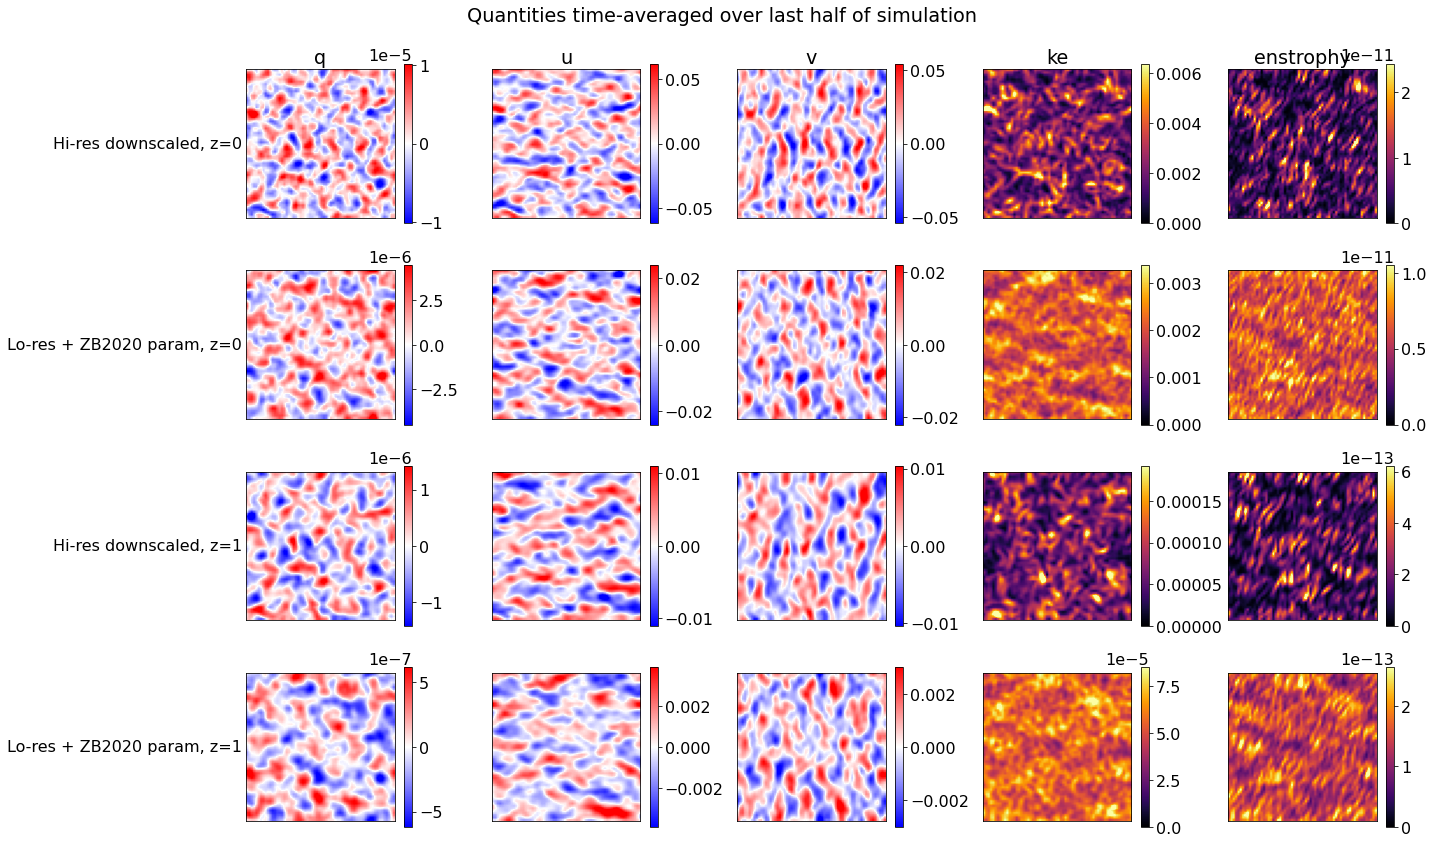

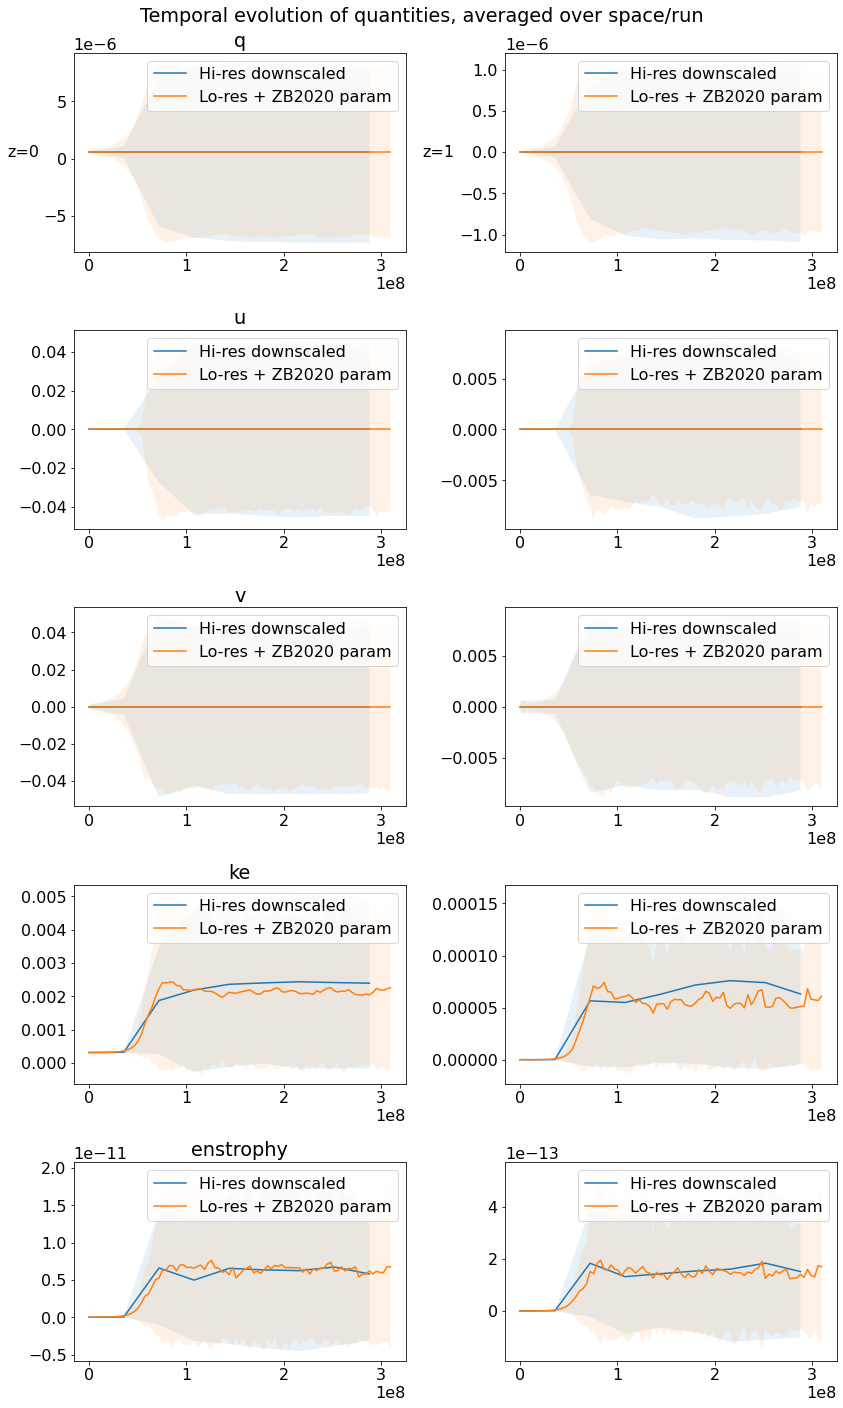

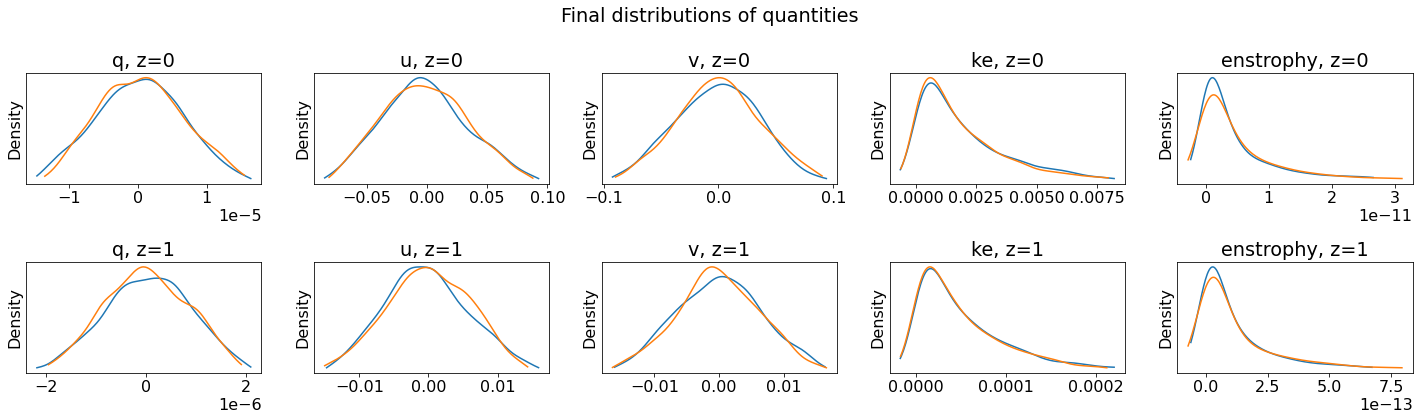

/Users/andrewross/code/pyqg_experiments/pyqg_subgrid_experiments/plot_helpers.py:570: RuntimeWarning: divide by zero encountered in log
  
/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/andrewross/code/pyqg_experiments/pyqg_subgrid_experiments/plot_helpers.py:570: RuntimeWarning: invalid value encountered in log
  
/Users/andrewross/code/pyqg_experiments/pyqg_subgrid_experiments/plot_helpers.py:570: RuntimeWarning: invalid value encountered in log
  
/Users/andrewross/code/pyqg_experiments/pyqg_subgrid_experiments/plot_helpers.py:570: RuntimeWarning: invalid value encountered in log
  


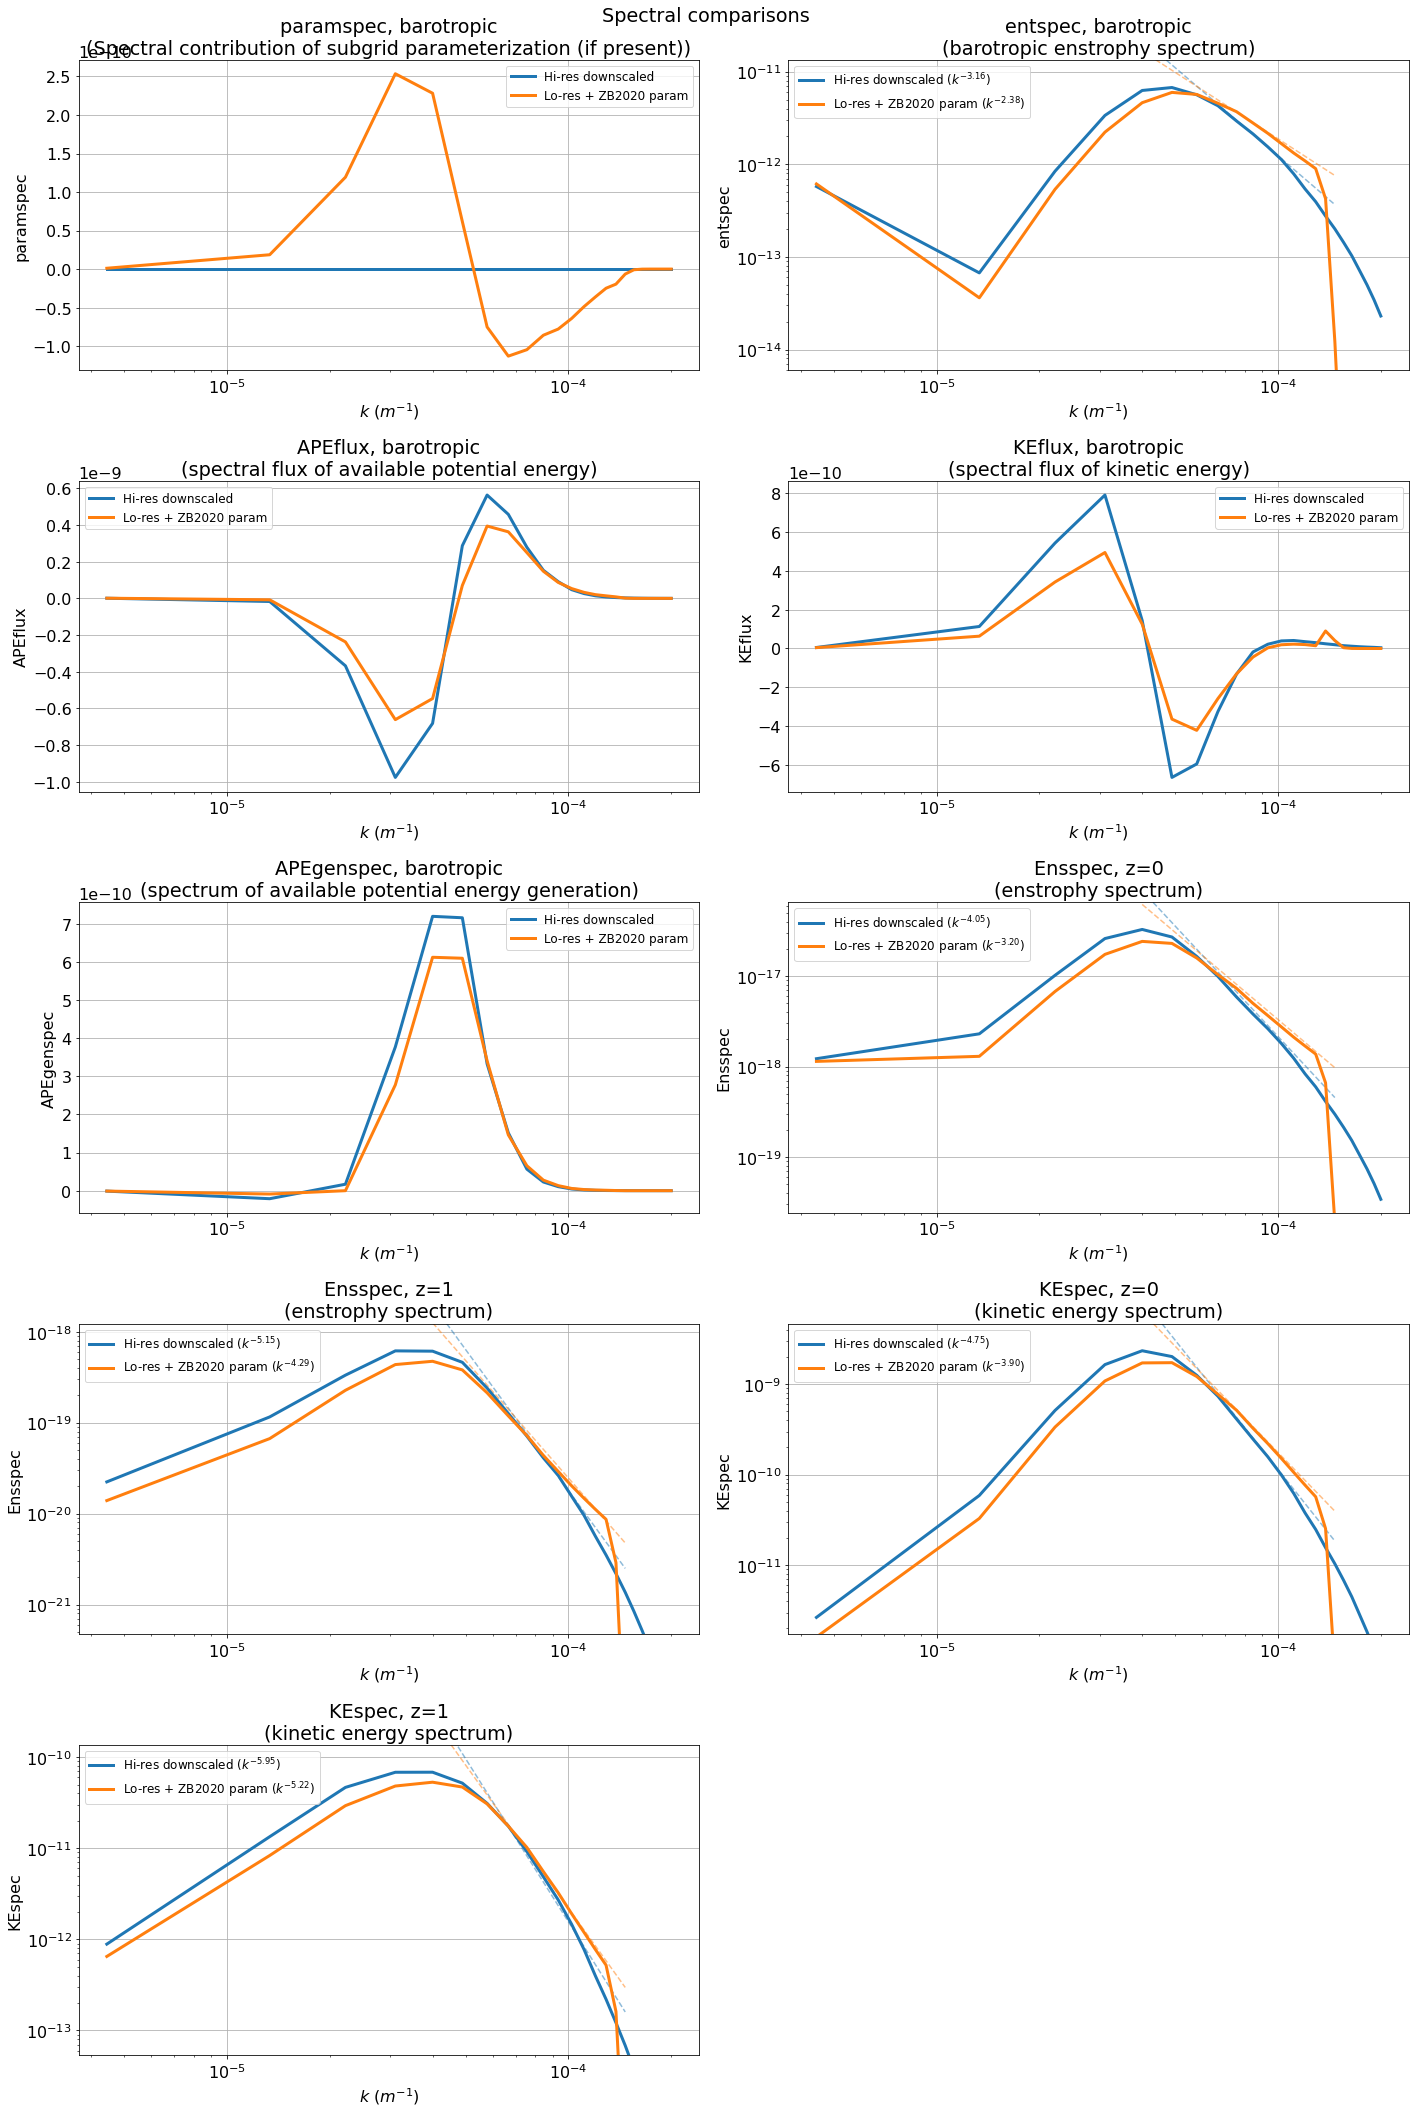

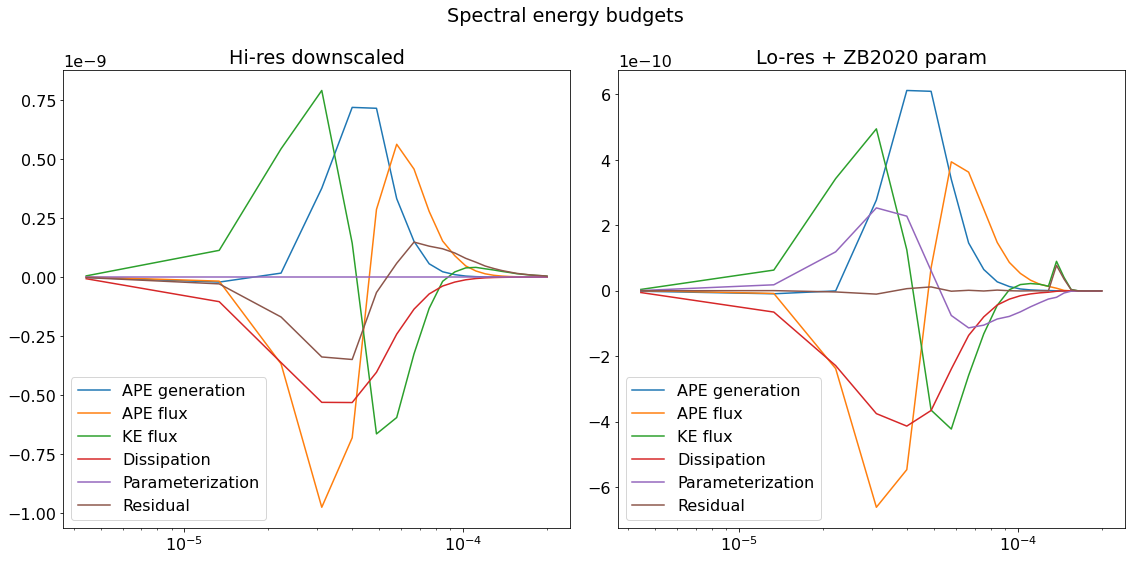

defaultdict(dict, {})

In [81]:
pse.plot_helpers.compare_simulations(
    dataset.assign_attrs(plot_kwargs=dict(label='Hi-res downscaled')),
    sims.assign_attrs(plot_kwargs=dict(label='Lo-res + ZB2020 param')))